In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

#Data Overview

In [ ]:
data = pd.read_csv("output.csv", index_col=0)

In [ ]:
data.head()

,Entity,Code,Year,Deaths,Sidedness
0,Afghanistan,AFG,1990,4154,0
1,Afghanistan,AFG,1991,4472,0
2,Afghanistan,AFG,1992,5106,0
3,Afghanistan,AFG,1993,5681,0
4,Afghanistan,AFG,1994,6001,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8010 entries, 0 to 8009
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     8010 non-null   object
 1   Code       6150 non-null   object
 2   Year       8010 non-null   int64 
 3   Deaths     8010 non-null   int64 
 4   Sidedness  8010 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 375.5+ KB




*   **Entity**	Name of the Country
*   **Code**	ISO Country Code
*   **Year**	Year for which the data is taken
*   **Deaths**	Number of deaths due to Road injuries - Sex: Both - Age: All Ages (Number)
*   **Sidedness**	The side where vehicle is driven. If 0 then Right if 1 then left



In [ ]:
def divider(text):
  print("*--------------------------------------------*")
  print(text)
  print("*--------------------------------------------*")

In [ ]:
text = f"Dataset have Total {len(list(data['Entity'].unique()))} of Countries."
divider(text)

*--------------------------------------------*
Dataset have Total 267 of Countries.
*--------------------------------------------*


In [ ]:
data.sample(5)

,Entity,Code,Year,Deaths,Sidedness
7933,Yemen,YEM,2003,9069,0
1361,"Central Europe, Eastern Europe, and Central Asia",NaN,2001,85506,0
5114,North Africa and Middle East,NaN,2004,138011,0
1721,Congo,COG,2001,1293,0
3058,Guatemala,GTM,2018,2750,0


In [ ]:
data.describe()

,Year,Deaths,Sidedness
count,8010.000000,8.010000e+03,8010.000000
mean,2004.500000,4.451661e+04,0.213483
std,8.655982,1.269077e+05,0.409791
min,1990.000000,0.000000e+00,0.000000
25%,1997.000000,3.322500e+02,0.000000
50%,2004.500000,1.969500e+03,0.000000
75%,2012.000000,1.323600e+04,0.000000
max,2019.000000,1.285039e+06,1.000000


#Data Processing and Cleaning

In [ ]:
data.isnull().sum()

Entity          0
Code         1860
Year            0
Deaths          0
Sidedness       0
dtype: int64

In [ ]:
divider(f"Dataset have total {data.isnull().sum().sum()} null values.")

*--------------------------------------------*
Dataset have total 1860 null values.
*--------------------------------------------*


In [ ]:
data['Code'].head()

0    AFG
1    AFG
2    AFG
3    AFG
4    AFG
Name: Code, dtype: object

In [ ]:
data[data['Code'].isnull()]

,Entity,Code,Year,Deaths,Sidedness
30,Africa,NaN,1990,179869,0
31,Africa,NaN,1991,181011,0
32,Africa,NaN,1992,185306,0
33,Africa,NaN,1993,186756,0
34,Africa,NaN,1994,189791,0
...,...,...,...,...,...
7915,World Bank Upper Middle Income,NaN,2015,503195,0
7916,World Bank Upper Middle Income,NaN,2016,493729,0
7917,World Bank Upper Middle Income,NaN,2017,485656,0
7918,World Bank Upper Middle Income,NaN,2018,483265,0


In [ ]:
# As Code have no significance here and it is most vulnerable column so i am going to remove it

In [153]:
cleaned = data.drop('Code', axis=1)

In [154]:
cleaned.head()

,Entity,Year,Deaths,Sidedness
0,Afghanistan,1990,4154,0
1,Afghanistan,1991,4472,0
2,Afghanistan,1992,5106,0
3,Afghanistan,1993,5681,0
4,Afghanistan,1994,6001,0


In [155]:
def _side(x):
  if x == 0:
    return "Right"
  if x == 1:
    return "Left"

In [156]:
cleaned['Sidedness'] = cleaned['Sidedness'].apply(lambda x: _side(x))

In [157]:
cleaned.head()

,Entity,Year,Deaths,Sidedness
0,Afghanistan,1990,4154,Right
1,Afghanistan,1991,4472,Right
2,Afghanistan,1992,5106,Right
3,Afghanistan,1993,5681,Right
4,Afghanistan,1994,6001,Right


In [158]:
cleaned.isnull().sum()

Entity       0
Year         0
Deaths       0
Sidedness    0
dtype: int64

#EDA

In [159]:
divider(f"{cleaned['Deaths'].sum()/1000000} millions deaths till 2019.")

*--------------------------------------------*
356.57808 millions deaths till 2019.
*--------------------------------------------*


In [160]:
cleaned.head()

,Entity,Year,Deaths,Sidedness
0,Afghanistan,1990,4154,Right
1,Afghanistan,1991,4472,Right
2,Afghanistan,1992,5106,Right
3,Afghanistan,1993,5681,Right
4,Afghanistan,1994,6001,Right


Which year has most deaths?

In [161]:
d_year = cleaned['Year'][cleaned['Deaths'] == cleaned['Deaths'].max()].values[0]
d_index = cleaned['Year'][cleaned['Deaths'] == cleaned['Deaths'].max()].index[0]
divider(f"Year {d_year} has maximum {d_index} of deaths.")

*--------------------------------------------*
Year 2008 has maximum 7788 of deaths.
*--------------------------------------------*


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



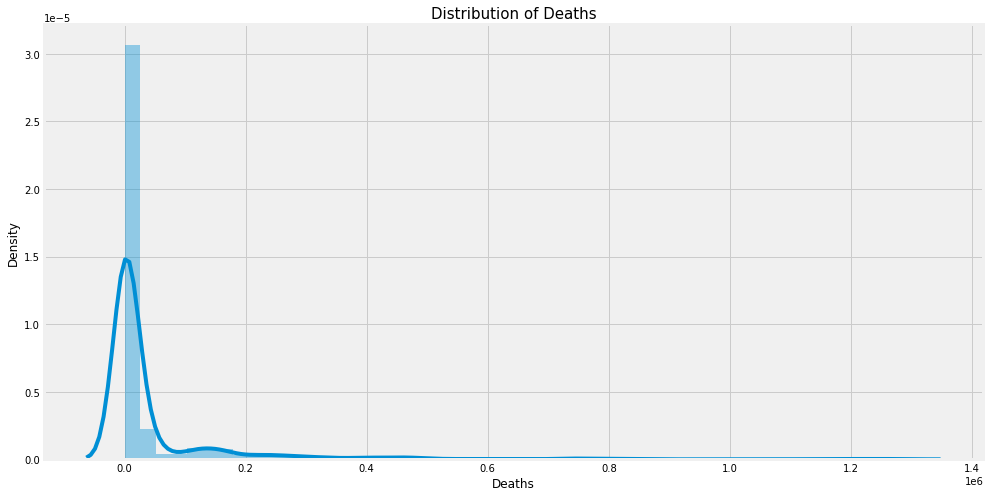

In [162]:
plt.figure(figsize=(15, 8))
plt.title("Distribution of Deaths",fontsize=15)
sns.distplot(cleaned['Deaths'])

In [163]:
cleaned.nunique()

Entity        267
Year           30
Deaths       5054
Sidedness       2
dtype: int64

In [182]:
data = cleaned.copy()
df_agg_min = data.groupby('Entity')['Deaths'].sum().reset_index()

df_agg_min.sort_values('Deaths', ascending=True, inplace=True, kind="stable")
df_agg_min.set_index('Entity', inplace=True)

In [190]:
import plotly.express as px


# Visualise
fig = px.bar(df_agg_min.head(10), y='Deaths', x=df_agg_min.head(10).index, text_auto='.1s',
            title="Top 10 Entities with the lowest road traffic death toll (1990-2019)")
fig.update_traces(textfont_size=10, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title_x=0.5,
                  titlefont_size=16)
fig.show()

In [184]:
data = cleaned.copy()
df_agg_max = data.groupby('Entity')['Deaths'].sum().reset_index()

df_agg_max.sort_values('Deaths', ascending=False, inplace=True, kind="stable")
df_agg_max.set_index('Entity', inplace=True)

In [189]:
fig = px.bar(df_agg_max.head(10), y="Deaths", x=df_agg_max.head(10).index, text_auto=".1s",
             title="Top 10 Entities with the highest road traffic death toll (1990-2019)")

fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title_x=0.5,
                  titlefont_size=16)
fig.show()

In [196]:
df = cleaned.copy()
max_deaths_year = df.groupby("Year")["Deaths"].sum().reset_index()

max_deaths_year.sort_values(ascending=False, inplace=True, by="Deaths")
max_deaths_year.set_index("Year", inplace=True)

In [206]:
fig = px.bar(data_frame=max_deaths_year.head(16), y="Deaths", x=max_deaths_year.head(16).index,
             text_auto=".1s", title="Top years of maximum Deaths")

fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title_x=0.5,
                  titlefont_size=16)
fig.show()

EDA by Muhammad Hanan Asghar